# 다항회귀와 과최적화

## 비선형 데이터

다음은 선형 모형으로는 회귀분석이 어려운 데이터의 한 예이다.

In [1]:
from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


In [2]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

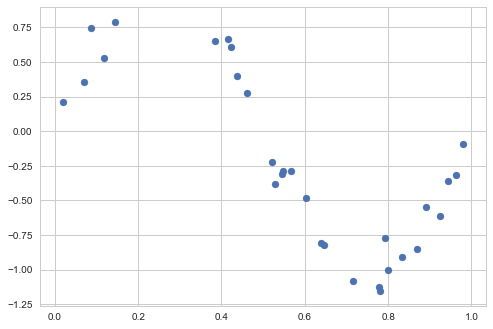

In [3]:
X, y = make_nonlinear()
plt.scatter(X, y)
plt.show()

## 선형 기저함수 모형 

이러한 비선형 데이터를 회귀분석 할 때는 직접 비선형 모형을 사용하기 보다는 다음과 같은 선형 기저함수 모형을 사용한다.

일반적인 선형 회귀 모형은 다음과 같은 수식을 만족한다.

$$ y_i = \sum_{i=1}^{D} w_i x_i = w^T x $$

이 때 가중치 벡터 $w$의 차원은 독립 변수의 차원과 같다. 즉 $x \in \mathbf{R}^D$  이면 $w \in \mathbf{R}^D$  이다.

선형 기저함수 모형(Linear Basis Function Models)은 x를 직접 선형 조합(linear combination)하지 않고 기저함수를 통해 변환한 값을 새로운 독립 변수로 가정하고 선형 회귀 모형을 적용한 것과 같다. 따라서 기저함수에 따라 가중치 벡터의 차원이 달라질 수 있다. 즉, $ \phi(\cdot): \mathbf{R}^D \rightarrow \mathbf{R}^M $ 이면  $w \in \mathbf{R}^M$  이다.

$$ y_i = \sum_{j=1}^{M} w_j \phi_j(x)  = w^T \phi(x)  $$

## 다항회귀

다항회귀는 다음과 같은 다항식 함수를 기저함수로 사용하는 선형 기저함수 모형의 일종이다.

$$ 1, x, x^2, \ldots, x^M $$

따라서 종속 변수와 독립 변수의 관계는 다음과 같이 표현할 수 있다.

$$ y = w_0 + w_1x + w_2x^2  + \ldots  + w_M x^M $$


## StatsModels를 이용한 다항회귀

StatsModels에서는 `OLS` 클래스의 `from_formula` 메서드를 사용하여 다항회귀를 할 수 있다.

In [4]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [5]:
print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           1.69e-06
Time:                        20:09:15   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [19]:
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary()) ## x 가 2차일때 모델 fitting 보기 (R-sqaured)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           9.14e-06
Time:                        20:12:36   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

In [20]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) ", data=df).fit().summary()) ## x**3차인경우 R-square가 급격하게 늘어남 fitting 이 잘 됨
## R-squared 보기 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           1.06e-17
Time:                        20:12:50   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

In [23]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) ", data=df).fit().summary()) ## x**3차인경우 R-square가 급격하게 늘어남 fitting 이 잘 됨
## R-squared 보기 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           1.06e-17
Time:                        20:14:51   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

In [21]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) +I(x**4) +I(x**5)+I(x**6)+I(x**7)", data=df).fit().summary()) ## x**7차인경우 과최적화
## R-squared 보기 
## 과최적화 부작용: 예측이 불가능. prediction()을 햇을경우 이상한 값이 나옴, w 를 찾을때 잘 못 찾음 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     106.9
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           1.68e-15
Time:                        20:13:04   Log-Likelihood:                 25.492
No. Observations:                  30   AIC:                            -34.98
Df Residuals:                      22   BIC:                            -23.77
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0841      0.250      0.336      0.7

회귀분석 결과를 그림으로 그리면 다음과 같다.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)
    
    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)
    
    model_str = "y ~ "
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()
    
    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("Degree={}, Seed={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)
    
    return result

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


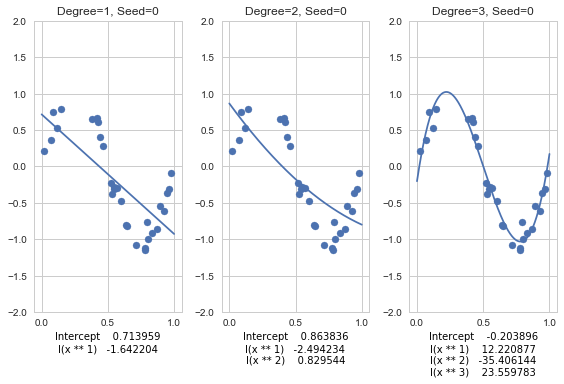

In [25]:
ax1 = plt.subplot(131)
polyreg(1, ax=ax1)
ax2 = plt.subplot(132)
polyreg(2, ax=ax2)
ax3 = plt.subplot(133)
polyreg(3, ax=ax3)
plt.tight_layout()
plt.show()

## Scikit-Learn을 이용한 다항회귀

Scikit-Learn에서는 preprocessing 서브 패키지의 `PolynomialFeatures` 클래스를 파이프라인으로 사용하여 다항회귀를 할 수 있다. 다만 `PolynomialFeatures` 에서는 상호작용(interaction) 항이 항상 포함되므로 주의해야 한다.

## 과최적화

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는 
* 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나 
* 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다.

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다. 

과최적화가 문제가 되는 이유는 다음과 같다.

* 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다. (cross-validation 오차)
* 샘플이 조금만 변화해도 fitting 결과가 크게 달라지며



다음 그림에서 과최적화 발생하면 주어진 데이터가 아닌 다른 새로운 x 데이터가 들어올 때 오차가 커지는 것을 볼 수 있다.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


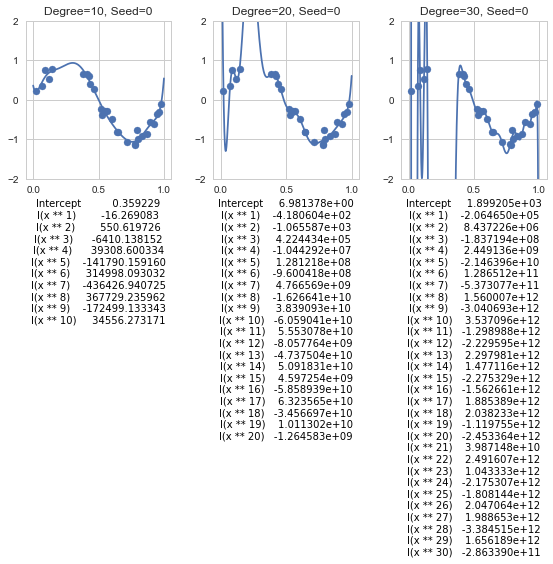

In [26]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(10, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, ax=ax2)
ax3 = plt.subplot(133)
polyreg(30, ax=ax3)
plt.tight_layout()
plt.show()

## 과최적화의 예시- 새로운 x값을 넣으면 정말 이상한 값을 예상하여 내놓음 

또한 데이터가 조금만 달라져도 최적화 결과가 크게 달라지는 것도 확인할 수 있다. 

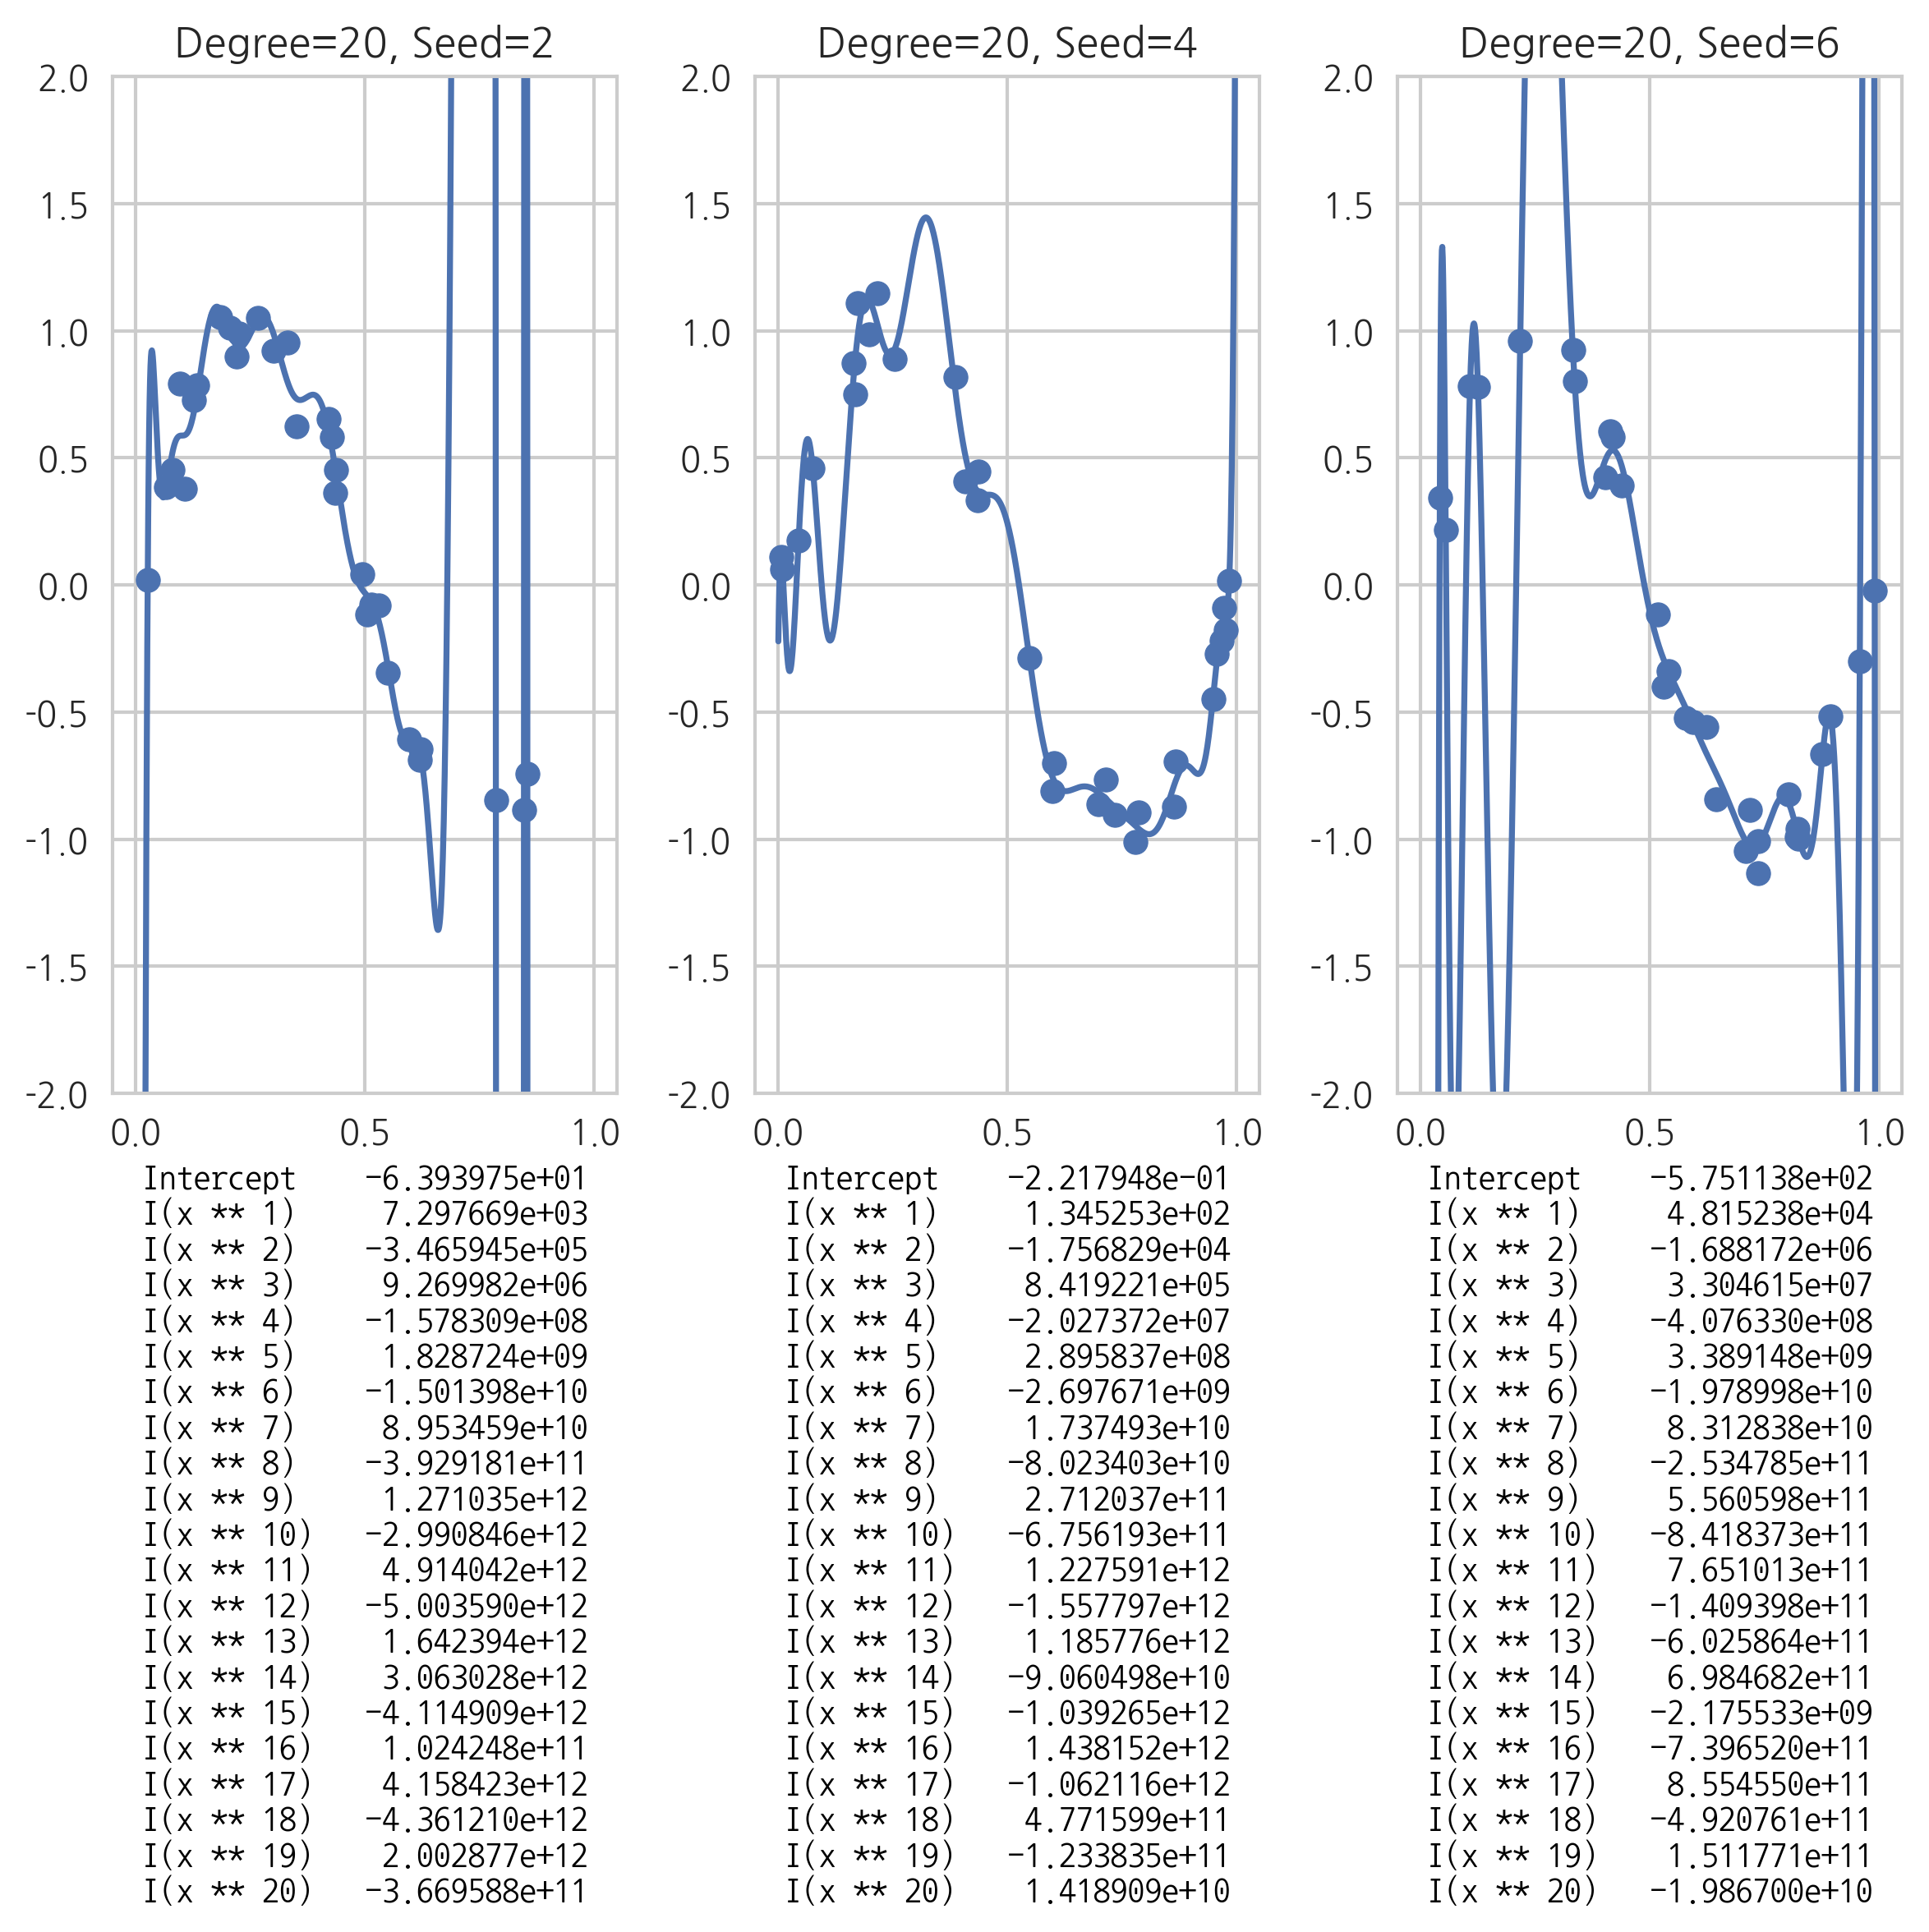

In [28]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.tight_layout()
plt.show()